In [5]:

from scipy.ndimage import median_filter
from scipy.stats import binned_statistic
from astropy.io import fits
from tqdm import tqdm
import numpy as np
import os, glob
import matplotlib.pyplot as plt

dir = '/mnt/datazpool/PL/yjkim/flat_characterization/2025-02-11/mean_std/'
logrec = []
files = glob.glob(dir+'*.fits')

import PLred.visPLred.preprocess as pp
import importlib
importlib.reload(pp)

<module 'PLred.visPLred.preprocess' from '/home/first/yjkim/PLred/PLred/visPLred/preprocess.py'>

Read flats with multiple flux levels

In [27]:
ts, ims, sig_ims = pp.read_flat_files(files)

In [31]:
print(np.unique(ts))

[ 0.05   0.1    0.25   0.375  0.4    0.5    0.75   0.8    0.875  1.
  1.25   1.375  1.5    1.625  1.75   1.875  2.     2.25   2.375  2.5
  2.625  2.75   2.875  3.     3.125  3.25   3.375  3.5    3.625  3.75
  3.875  4.     5.     6.     6.5    7.     8.     9.    10.   ]


Fit nonlinearity curve for a single pixel

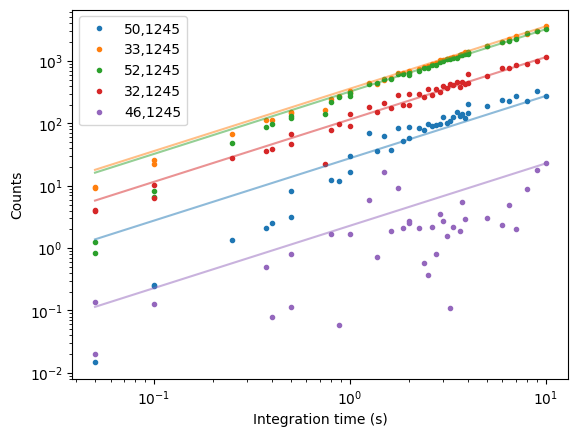

In [7]:
plt.loglog(ts, ims[:, 50, 1245], 'o', label='50,1245', ms=3)
plt.loglog(ts, ims[:, 33, 1245], 'o', label='33,1245', ms=3)
plt.loglog(ts, ims[:, 52, 1245], 'o', label='52,1245', ms=3)
plt.loglog(ts, ims[:, 32, 1245], 'o', label='32,1245', ms=3)
plt.loglog(ts, ims[:, 46, 1245], 'o', label='46,1245', ms=3)

plt.loglog(ts, ims[-1,50,1245]*ts/ts[-1], color='C0', alpha=0.5)
plt.loglog(ts, ims[-1,33,1245]*ts/ts[-1], color='C1', alpha=0.5)
plt.loglog(ts, ims[-1,52,1245]*ts/ts[-1], color='C2', alpha=0.5)
plt.loglog(ts, ims[-1,32,1245]*ts/ts[-1], color='C3', alpha=0.5)
plt.loglog(ts, ims[-1,46,1245]*ts/ts[-1], color='C4', alpha=0.5)
plt.xlabel('Integration time (s)')
plt.ylabel('Counts')
plt.legend()

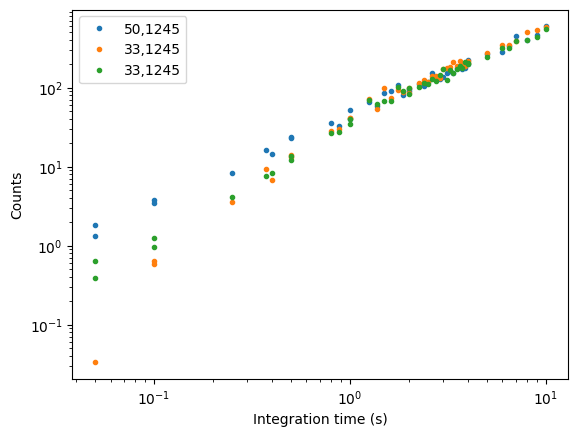

In [249]:
plt.loglog(ts, ims[:, 340, 1240], 'o', label='50,1245', ms=3)
plt.loglog(ts, ims[:, 340, 1241], 'o', label='33,1245', ms=3)
plt.loglog(ts, ims[:, 340, 1242], 'o', label='33,1245', ms=3)
# plt.loglog(ts, ims[:, 52, 1245], 'o', label='52,1245', ms=3)
# plt.loglog(ts, ims[:, 32, 1245], 'o', label='32,1245', ms=3)
# plt.loglog(ts, ims[:, 46, 1245], 'o', label='46,1245', ms=3)

# plt.loglog(ts, ims[-1,50,1245]*ts/ts[-1], color='C0', alpha=0.5)
# plt.loglog(ts, ims[-1,33,1245]*ts/ts[-1], color='C1', alpha=0.5)
# plt.loglog(ts, ims[-1,52,1245]*ts/ts[-1], color='C2', alpha=0.5)
# plt.loglog(ts, ims[-1,32,1245]*ts/ts[-1], color='C3', alpha=0.5)
# plt.loglog(ts, ims[-1,46,1245]*ts/ts[-1], color='C4', alpha=0.5)
plt.xlabel('Integration time (s)')
plt.ylabel('Counts')
plt.legend()

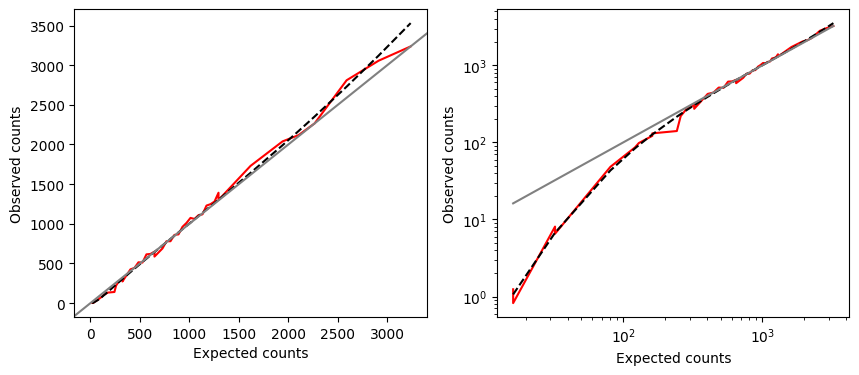

In [14]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 52, 1245], -1, plot=True)

/home/first/yjkim/PLred/PLred/visPLred/preprocess.py:28: RuntimeWarning: invalid value encountered in log10
  clean_idx = np.isfinite(np.log10(xval)) & np.isfinite(np.log10(yval)) #& (np.log10(_x) > 0) & (_y > 0)


Possible roots: [4.42228235e-07 4.19535260e+03 4.55016886e+01]
Error correcting 50 attempt to get argmin of an empty sequence


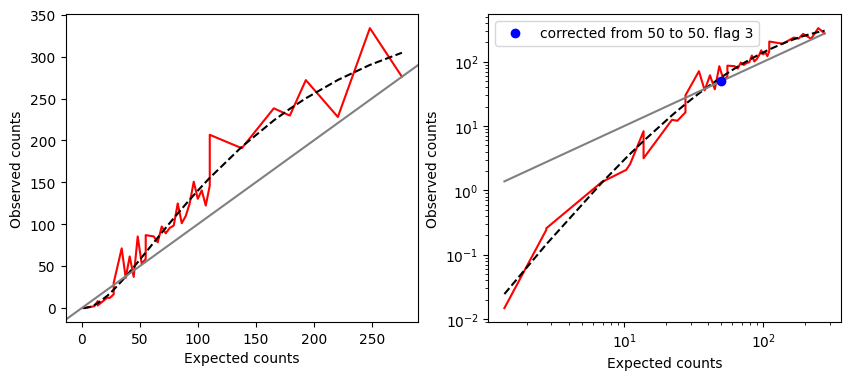

In [8]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 50, 1245], -1, plot=True, val_to_correct = 50)

Possible roots: [18.389363+0.j]
Successfully corrected 10 to (18.38936300445686+0j)


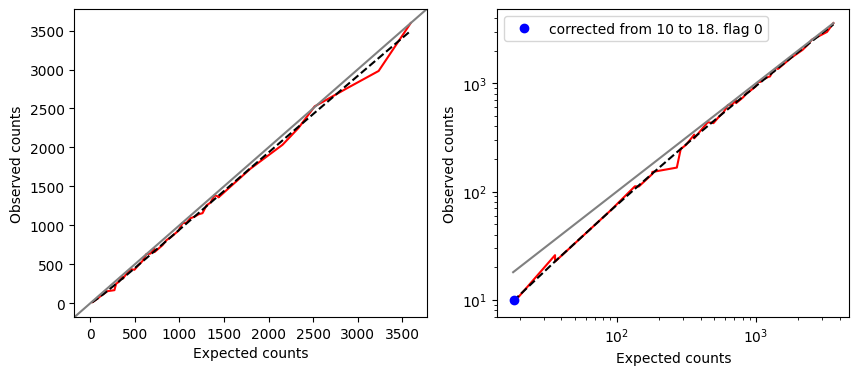

In [296]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 33, 1245], -1, plot=True, val_to_correct = 10)

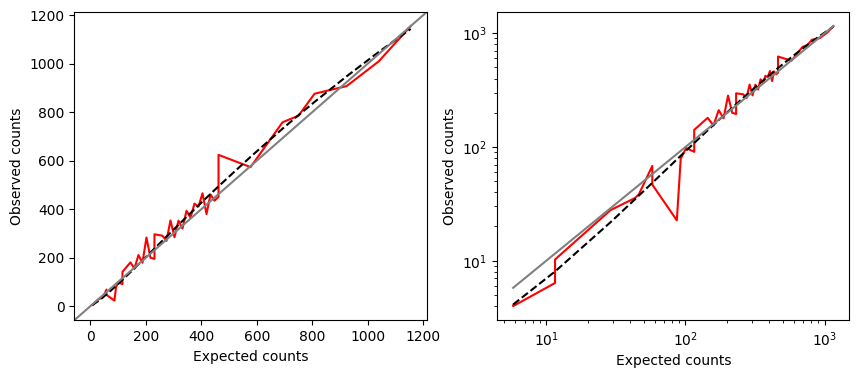

In [19]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 32, 1245], -1, plot=True)

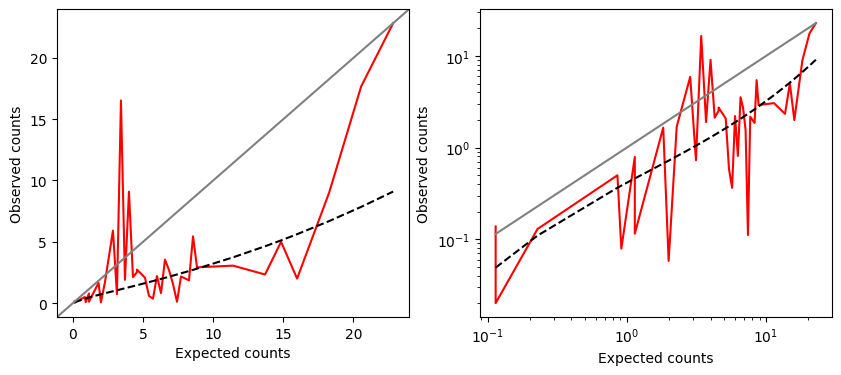

In [73]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 46, 1245], -1, plot=True)

Possible roots: [1.79490478e+03 3.52512904e+01 6.80057148e-01]
Successfully corrected 10 to 35.25129040789846


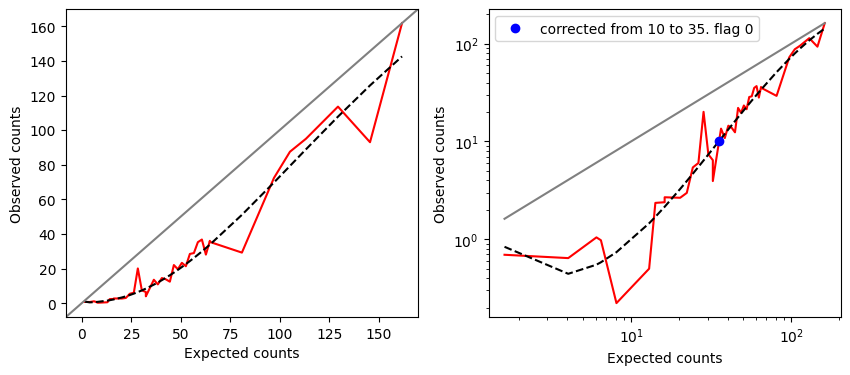

In [295]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 343, 1112], -1, plot=True, val_to_correct = 10)

Possible roots: [3.15667635e+02 8.83237418e+01 1.05691457e-01]
Value 315.6676354743989 larger than 201.33333333333334


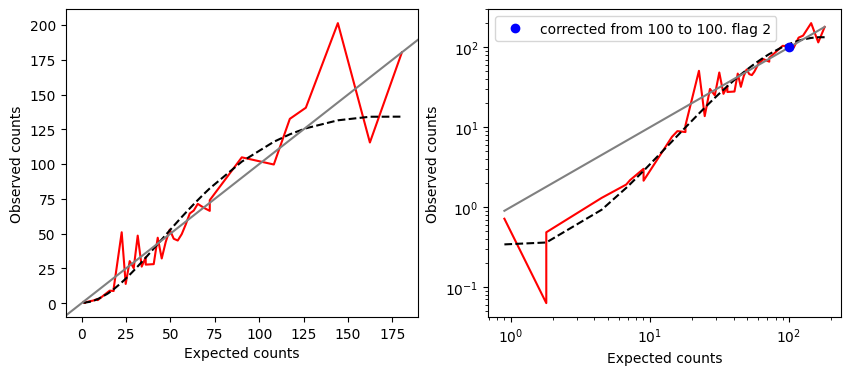

In [ ]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 176, 1593], -1, plot=True, val_to_correct = 10)

Possible roots: [972.05839082+0.j]
Error correcting 1000 attempt to get argmin of an empty sequence


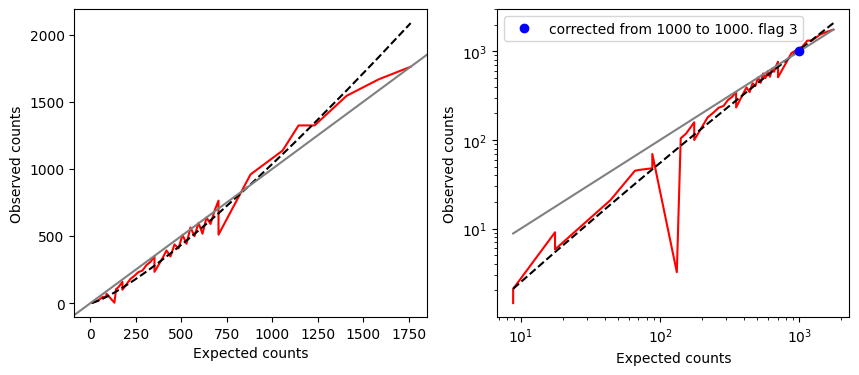

In [26]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 53, 1203], -1, plot=True, val_to_correct = 1000)

Possible roots: [6.51812023e+02 1.72022196e+01 2.10360777e-01]
Successfully corrected 10 to 17.202219649595552


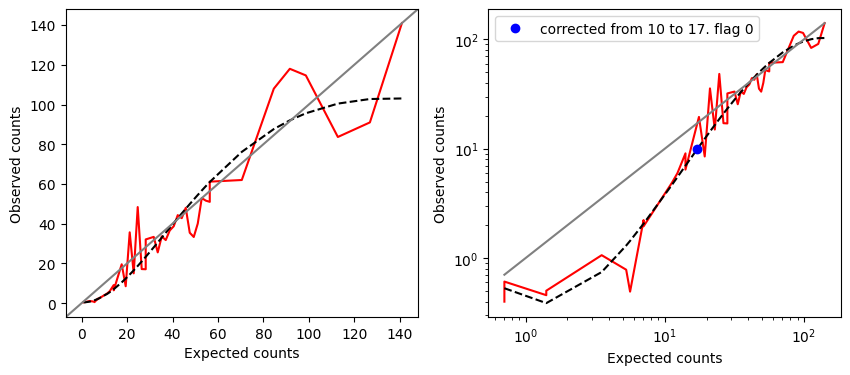

In [292]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 6, 233], -1, plot=True, val_to_correct = 10)

Possible roots: [3.48216162e+04 1.01597473e-02 2.33592794e+01]
Successfully corrected 10 to 23.35927936377375


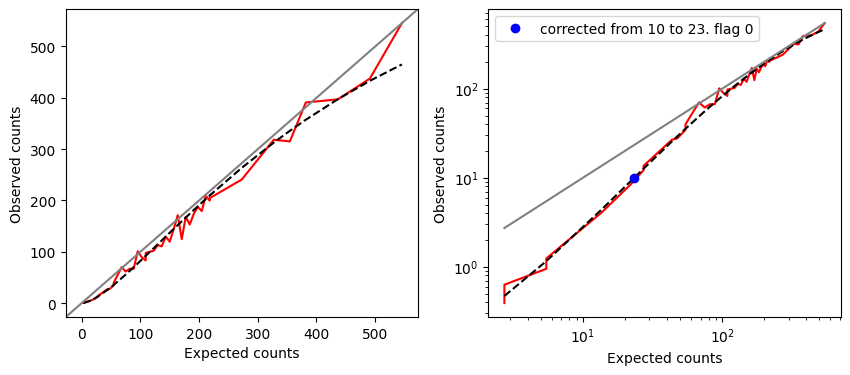

In [281]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 340, 1242], -1, plot=True, val_to_correct = 10)

Possible roots: [23.51873609+0.j]
Successfully corrected 10 to (23.51873609108061+0j)


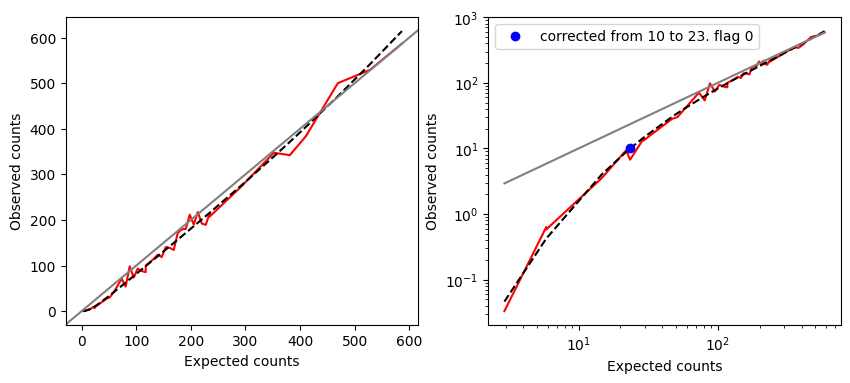

In [282]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 340, 1241], -1, plot=True, val_to_correct = 10)

Repeat over all the pixels

In [2]:
all_poly_results, minvals, maxvals = pp.model_nonlinearity_from_flats(files, outname='model_nonlinearity_cutmin100.fits')


  0%|          | 0/412 [00:00<?, ?it/s]/home/first/yjkim/PLred/PLred/visPLred/preprocess.py:28: RuntimeWarning: invalid value encountered in log10
  clean_idx = np.isfinite(np.log10(xval)) & np.isfinite(np.log10(yval)) #& (np.log10(_x) > 0) & (_y > 0)
/home/first/yjkim/PLred/PLred/visPLred/preprocess.py:28: RuntimeWarning: divide by zero encountered in log10
  clean_idx = np.isfinite(np.log10(xval)) & np.isfinite(np.log10(yval)) #& (np.log10(_x) > 0) & (_y > 0)
100%|██████████| 412/412 [00:43<00:00,  9.57it/s]


Saved results to model_nonlinearity_cutmin100.fits


In [114]:
np.where(all_poly_results[:,:,0] > 0)[0][10000]

np.int64(34)

In [113]:
np.where(all_poly_results[:,:,0] > 0)[1][10000]


np.int64(204)

In [118]:
np.sum(all_poly_results[:,:,1]**2 - 3 * all_poly_results[:,:,0] * all_poly_results[:,:,2] > 0)

np.int64(295893)

In [121]:
np.sum((np.sqrt(all_poly_results[:,:,1]**2 - 3 * all_poly_results[:,:,0] * all_poly_results[:,:,2]) - all_poly_results[:,:,1] > 0) & (all_poly_results[:,:,1]**2 - 3 * all_poly_results[:,:,0] * all_poly_results[:,:,2] > 0))

/tmp/ipykernel_2541695/4215203358.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sum((np.sqrt(all_poly_results[:,:,1]**2 - 3 * all_poly_results[:,:,0] * all_poly_results[:,:,2]) - all_poly_results[:,:,1] > 0) & (all_poly_results[:,:,1]**2 - 3 * all_poly_results[:,:,0] * all_poly_results[:,:,2] > 0))


np.int64(247954)

In [184]:
theroot = (np.sqrt(all_poly_results[:,:,1]**2 - 3 * all_poly_results[:,:,0] * all_poly_results[:,:,2]) - all_poly_results[:,:,1]) / (3 * all_poly_results[:,:,0])
np.sum((theroot > 0) & (theroot < np.log10(maxvals)))

moremask = (theroot > 0) & (theroot < np.log10(maxvals))

/tmp/ipykernel_2541695/3865504826.py:1: RuntimeWarning: invalid value encountered in sqrt
  theroot = (np.sqrt(all_poly_results[:,:,1]**2 - 3 * all_poly_results[:,:,0] * all_poly_results[:,:,2]) - all_poly_results[:,:,1]) / (3 * all_poly_results[:,:,0])


(300.0, 400.0)

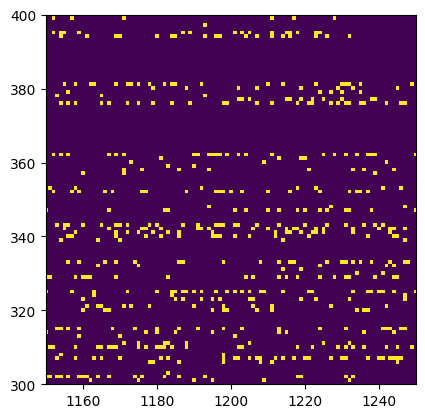

In [187]:
plt.imshow(moremask)
plt.xlim([1150,1250])
plt.ylim([300,400])

/tmp/ipykernel_2541695/1793346064.py:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(minvals[10,400:600]))


(-10.0, 10.0)

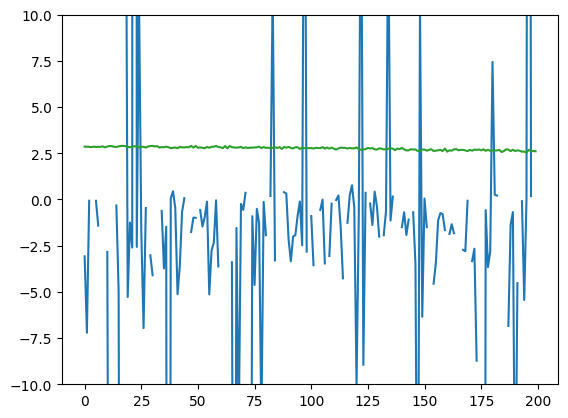

In [178]:
plt.plot(theroot[10,400:600])
plt.plot(np.log10(minvals[10,400:600]))
plt.plot(np.log10(maxvals[10,400:600]))
plt.ylim([-10,10])

In [159]:
np.nanmax(np.log10(maxvals))

np.float64(4.232055390776589)

In [182]:
print(np.where((theroot > 0) & (theroot < np.log10(maxvals)))[0][32])
print(np.where((theroot > 0) & (theroot < np.log10(maxvals)))[1][32])

6
233


In [163]:
print(np.where((theroot > 0) & (theroot < 3))[0][10])
print(np.where((theroot > 0) & (theroot < 3))[1][10])

5
276


In [123]:
np.sum(~(np.sqrt(all_poly_results[:,:,1]**2 - 3 * all_poly_results[:,:,0] * all_poly_results[:,:,2]) - all_poly_results[:,:,1] > 0))

/tmp/ipykernel_2541695/3656064440.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sum(~(np.sqrt(all_poly_results[:,:,1]**2 - 3 * all_poly_results[:,:,0] * all_poly_results[:,:,2]) - all_poly_results[:,:,1] > 0))


np.int64(533198)

In [125]:
len(all_poly_results[:,:,0].flatten()) - 247954

533198

In [112]:
np.shape(np.where(all_poly_results[:,:,0] > 0))

(2, 221586)

0.05558367114181011


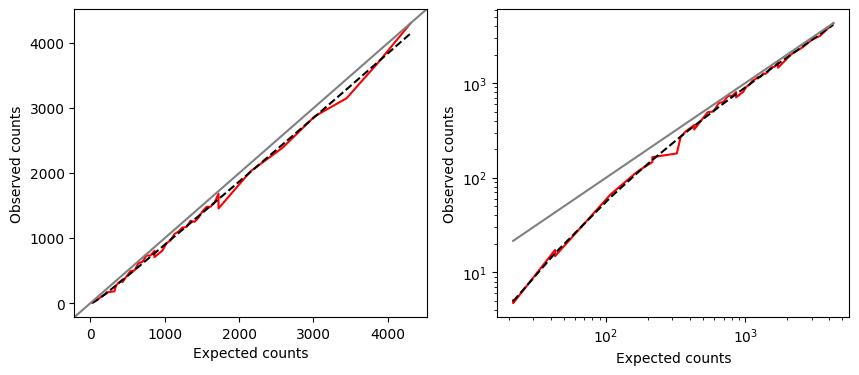

In [116]:
poly, fig = pp.fit_nonlinearity_curve(ts, ims[:, 34, 204], -1, plot=True)
print(poly[0])


(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 4.00000e+00, 6.00000e+00, 1.10000e+01, 3.00000e+01,
        8.40000e+01, 1.89000e+02, 4.34000e+02, 1.15400e+03, 2.80600e+03,
        6.37300e+03, 1.39240e+04, 2.65570e+04, 4.72640e+04, 1.30938e+05,
        2.34408e+05, 3.42630e+04, 5.22900e+03, 1.73100e+03, 6.49000e+02,
        2.61000e+02, 1.13000e+02, 5.90000e+01, 2.50000e+01, 3.00000e+01,
        1.80000e+01, 1.20000e+01, 5.00000e+00, 5.00000e+00, 8.00000e+00,
        1.00000e+00, 2.00000e+00, 3.00000e+00, 5.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-2.93837354, -2.79284836, -2.64732318, -2.501798  , -2.35627281,
        -2.21074763, -2.06522245, -1.91969727, -1.77417209, -1.6286469 ,
        -1.48312172, -1.33759654, -1.19207136, -1.04654618, -0.90102099,
        -0.75549581, -0.60997063, -0.46444545, -0

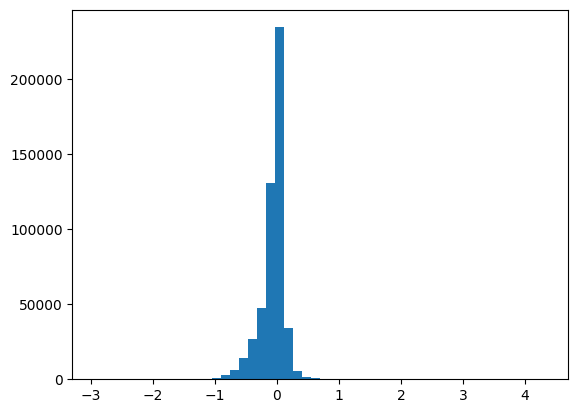

In [106]:
plt.hist(all_poly_results[:,:,0].flatten(),bins=50)

## Try correcting nonlinearity

In [9]:
maps = fits.getdata('/mnt/datazpool/PL/yjkim/reduced_map/betcmi_20250211/betcmi_20250211_couplingmap_frames_12:11:00_12:19:09.fits')
dark = fits.getdata('/mnt/datazpool/PL/yjkim/reduced/betcmi_20250211_fin/dark.fits')


In [10]:
frame = maps[7,7,:,:] - dark

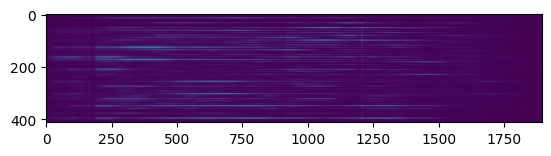

In [11]:
plt.imshow(frame)

In [13]:
corrected_data, flags = pp.correct_nonlinearity_map(frame, 'model_nonlinearity_cutmin100.fits',
                                                    xrange = np.arange(412),
                                                    yrange = np.arange(1100, 1300))

/home/first/yjkim/PLred/PLred/visPLred/preprocess.py:196: RuntimeWarning: invalid value encountered in log10
  logval = np.log10(observed_val)
/home/first/yjkim/PLred/PLred/visPLred/preprocess.py:241: ComplexWarning: Casting complex values to real discards the imaginary part
  corrected_data[x, y], flags[x, y] = correct_nonlinearity(frame[x, y], poly_results[x, y], minvals[x, y], maxvals[x, y])
/home/first/yjkim/PLred/PLred/visPLred/preprocess.py:200: RuntimeWarning: overflow encountered in power
  possible_root = 10**root[np.isreal(root)]


In [14]:
badpix = np.ones_like(flags, dtype=bool)
badpix[flags < 3] = False
nanmask = np.ones_like(flags, dtype=float)
nanmask[flags == 3] = np.nan

In [15]:
np.sum(~np.isfinite(nanmask))

np.int64(41505)

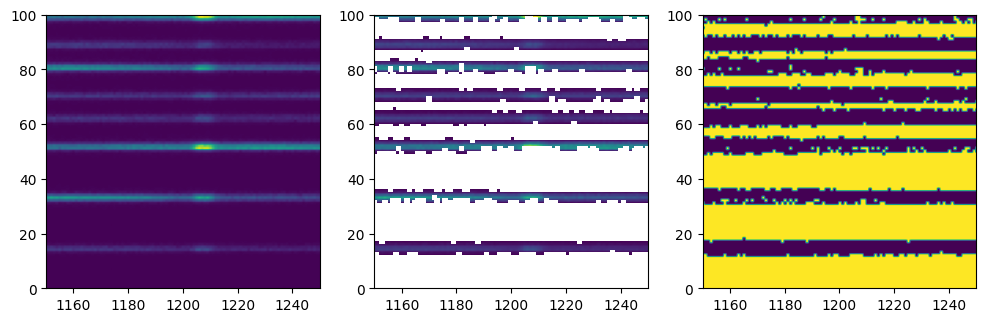

In [18]:

fig, axs = plt.subplots(ncols=3, figsize=(12,8))
axs[0].imshow(frame)
axs[1].imshow(corrected_data * nanmask)
axs[2].imshow(flags)
# axs[3].imshow(moremask)
for ax in axs:
    ax.set_xlim([1150,1250])
    ax.set_ylim([0,100])


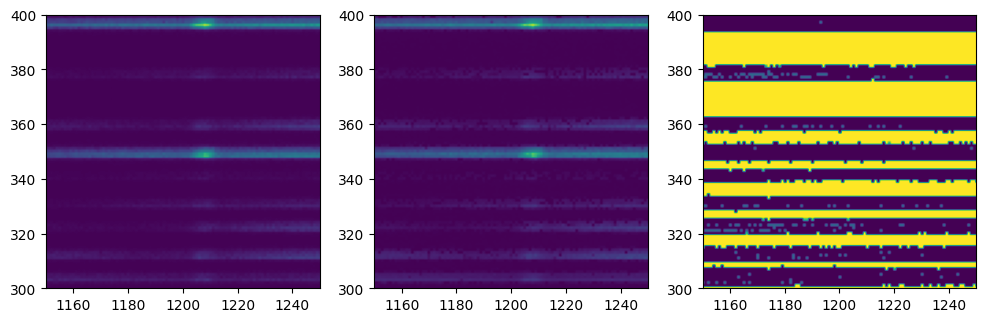

In [62]:

fig, axs = plt.subplots(ncols=3, figsize=(12,8))
axs[0].imshow(frame)
axs[1].imshow(corrected_data)
axs[2].imshow(flags)
for ax in axs:
    ax.set_xlim([1150,1250])
    ax.set_ylim([300,400])


In [317]:
from PLred.visPLred import spec as sp
from scipy.sparse import load_npz

wav_map = np.load('/home/first/yjkim/specmodels/2025-02-07/model_decemberneon/model_wavmap.npy')
matrix = load_npz('/home/first/yjkim/specmodels/2025-02-07/model_decemberneon/model_matrix.npz')

badpix = np.ones_like(flags, dtype=bool)
# badpix[(flags == 0)] = False
# badpix[(flags == 0) & (moremask == False)] = False
badpix[(flags == 0)] = False

spec0, res0 = sp.frame_to_spec(frame, 1100, 1300, wav_map, matrix, return_residual=True,
                                badpix=None)
spec, res = sp.frame_to_spec(corrected_data, 1100, 1300, wav_map, matrix, return_residual=True,
                                badpix=badpix)
            

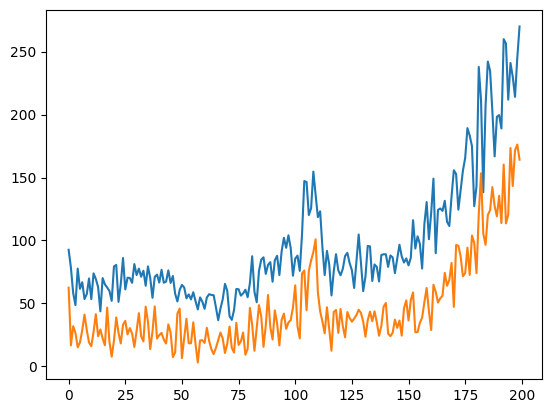

In [318]:
plt.plot(spec[33])
plt.plot(spec0[33])

(300.0, 400.0)

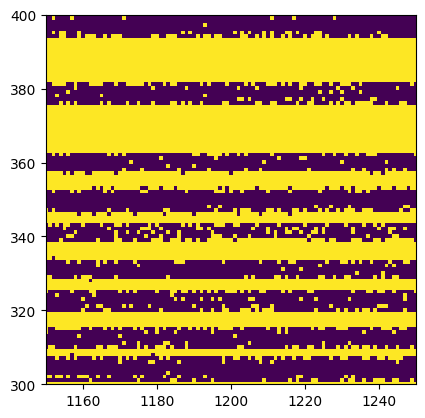

In [305]:
plt.imshow(badpix)
plt.xlim([1150,1250])
plt.ylim([300,400])

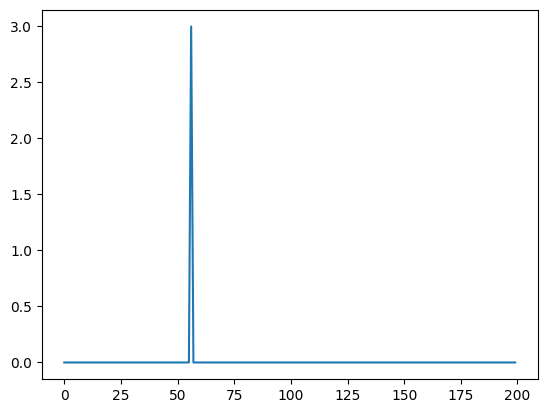

In [306]:
plt.plot(flags[340,1100:1300])

In [307]:
print(corrected_data[340,1240:1250])

[21.85446598 23.1357153  23.54423377 24.978987   23.63607137 23.1667553
 28.01787816 26.34376898 23.7729639  25.41941974]


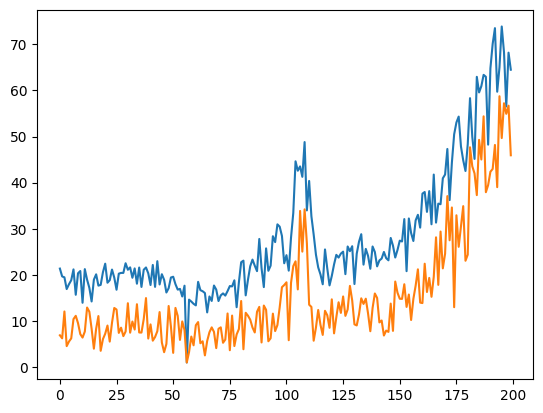

In [309]:
plt.plot((corrected_data)[340, 1100:1300])
# plt.plot((corrected_data * ~badpix)[340, 1100:1300])
plt.plot(frame[340, 1100:1300])

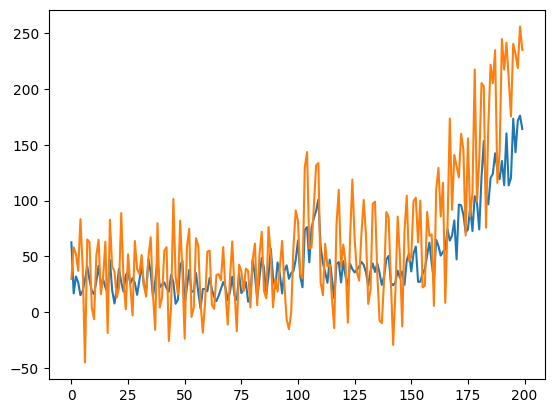

In [209]:
# plt.plot(spec[0])
# plt.plot(spec[1])
# plt.plot(spec[5])
plt.plot(spec0[33])
plt.plot(spec[33])

In [ ]:
plt.imshow(frame[:,1100:1300])


## Look at some statistics

(-0.5, 0.5)

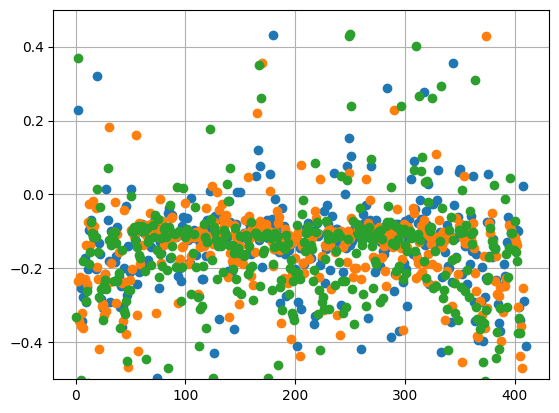

In [40]:
# plt.plot(all_poly_results[:,1245,0] / all_poly_results[:,1245,1], 'o')
plt.plot(all_poly_results[:,113,0] / all_poly_results[:,113,1], 'o')
plt.plot(all_poly_results[:,200,0] / all_poly_results[:,200,1], 'o')
plt.plot(all_poly_results[:,500,0] / all_poly_results[:,500,1], 'o')
plt.grid()
plt.ylim([-0.5,0.5])

In [6]:
np.shape(all_poly_results)

(412, 1896, 4)

In [14]:
all_poly_results[52,1200]

array([ 0.16936467, -1.57982731,  5.96582603, -5.2964351 ])

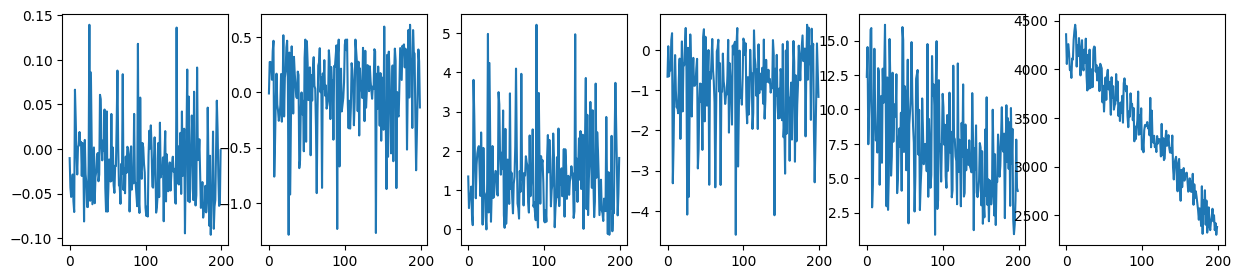

In [22]:
fig, axs = plt.subplots(ncols=6, figsize=(15,3))
x, y = 51, np.r_[1100:1300]
for i in range(4):
    axs[i].plot(all_poly_results[x,y,i])
axs[4].plot(minvals[x,y])
axs[5].plot(maxvals[x,y])

In [25]:
np.polyval?

Signature:       np.polyval(p, x)
Call signature:  np.polyval(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function polyval at 0x7fc5642b0a40>
File:            ~/miniconda3/envs/sklearn-env/lib/python3.13/site-packages/numpy/lib/_polynomial_impl.py
Docstring:      
Evaluate a polynomial at specific values.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

If `p` is of length N, this function returns the value::

    p[0]*x**(N-1) + p[1]*x**(N-2) + ... + p[N-2]*x + p[N-1]

If `x` is a sequence, then ``p(x)`` is returned for each element of ``x``.
If `x` is another polynomial then the composite polynomial ``p(x(t))``
is returned.

Parameters
----------
p : array_like or poly1d object
   1D array of polynomial coefficients (including coefficients equ

In [27]:
arr

array([  11.13436542,   16.67374242,   24.96897449,   37.39110702,
         55.99328417,   83.85009491,  125.56574455,  188.03504301,
        281.58298688,  421.67128655,  631.45389523,  945.6039207 ,
       1416.04443585, 2120.53038319, 3175.5       ])

(10, np.float64(11437.0))

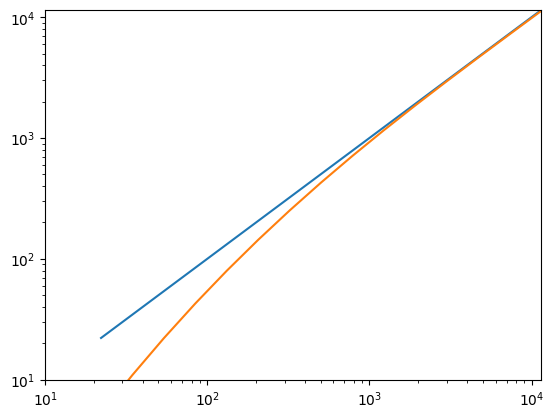

In [76]:
x, y = 61, 400
arr = np.linspace(np.log10(minvals[x,y]), np.log10(maxvals[x,y]), 15)
poly = np.polyval(all_poly_results[x,y,:], arr)
plt.loglog(10**arr, 10**arr)
plt.loglog(10**arr, 10**poly)
plt.ylim([10, maxvals[x,y]])
plt.xlim([10, maxvals[x,y]])


(-0.5, 0.5)

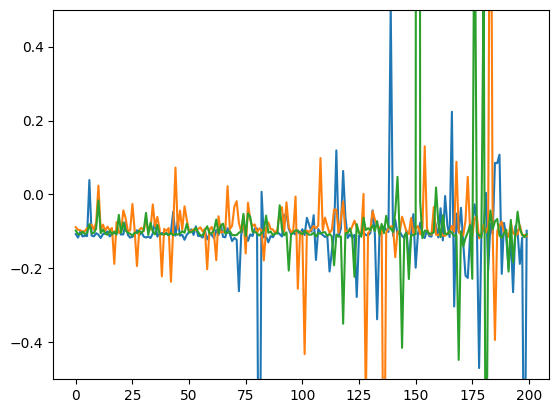

In [83]:
plt.plot(all_poly_results[71,1100:1300,0]/ all_poly_results[71,1100:1300,1])
plt.plot(all_poly_results[62,1100:1300,0]/ all_poly_results[62,1100:1300,1])
plt.plot(all_poly_results[52,1100:1300,0]/ all_poly_results[52,1100:1300,1])
plt.ylim([-0.5,0.5])

(-0.5, 0.5)

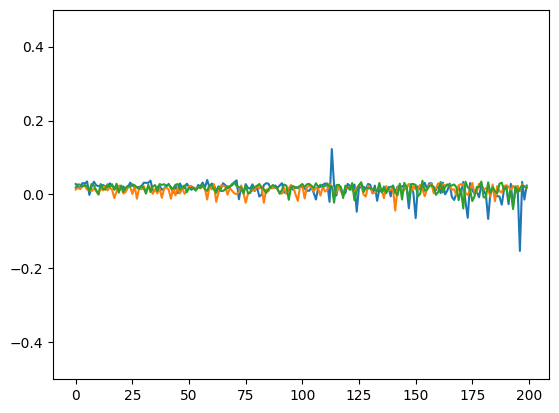

In [84]:
plt.plot(all_poly_results[71,1100:1300,0]/ all_poly_results[71,1100:1300,2])
plt.plot(all_poly_results[62,1100:1300,0]/ all_poly_results[62,1100:1300,2])
plt.plot(all_poly_results[52,1100:1300,0]/ all_poly_results[52,1100:1300,2])
plt.ylim([-0.5,0.5])

(-0.5, 0.5)

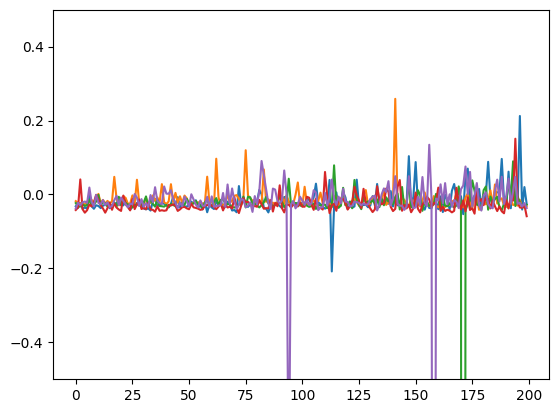

In [114]:
plt.plot(all_poly_results[71,1100:1300,0]/ all_poly_results[71,1100:1300,3])
plt.plot(all_poly_results[62,1100:1300,0]/ all_poly_results[62,1100:1300,3])
plt.plot(all_poly_results[52,1100:1300,0]/ all_poly_results[52,1100:1300,3])
plt.plot(all_poly_results[34,1100:1300,0]/ all_poly_results[34,1100:1300,3])
plt.plot(all_poly_results[81,1100:1300,0]/ all_poly_results[81,1100:1300,3])
plt.ylim([-0.5,0.5])

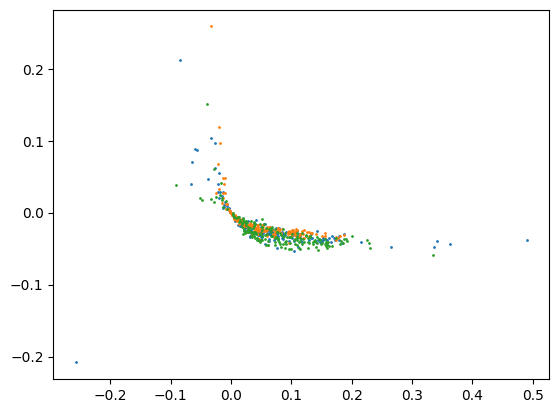

In [106]:
plt.plot(all_poly_results[71,1100:1300,0], all_poly_results[71,1100:1300,0]/ all_poly_results[71,1100:1300,3], 'o',ms=1)
plt.plot(all_poly_results[62,1100:1300,0], all_poly_results[62,1100:1300,0]/ all_poly_results[62,1100:1300,3], 'o',ms=1)
plt.plot(all_poly_results[34,1100:1300,0], all_poly_results[34,1100:1300,0]/ all_poly_results[34,1100:1300,3], 'o',ms=1)


(-0.2, 0.2)

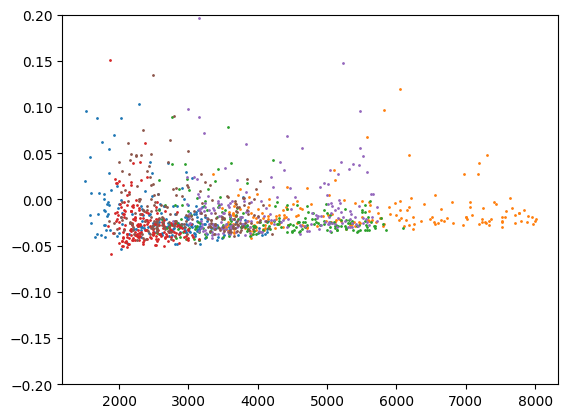

In [115]:
plt.plot(maxvals[71,1100:1300], all_poly_results[71,1100:1300,0]/ all_poly_results[71,1100:1300,3], 'o',ms=1)
plt.plot(maxvals[62,1100:1300], all_poly_results[62,1100:1300,0]/ all_poly_results[62,1100:1300,3], 'o',ms=1)
plt.plot(maxvals[52,1100:1300], all_poly_results[52,1100:1300,0]/ all_poly_results[52,1100:1300,3], 'o',ms=1)
plt.plot(maxvals[34,1100:1300], all_poly_results[34,1100:1300,0]/ all_poly_results[34,1100:1300,3], 'o',ms=1)
plt.plot(maxvals[33,1100:1300], all_poly_results[33,1100:1300,0]/ all_poly_results[33,1100:1300,3], 'o',ms=1)
plt.plot(maxvals[81,1100:1300], all_poly_results[81,1100:1300,0]/ all_poly_results[81,1100:1300,3], 'o',ms=1)
plt.ylim([-0.2,0.2])

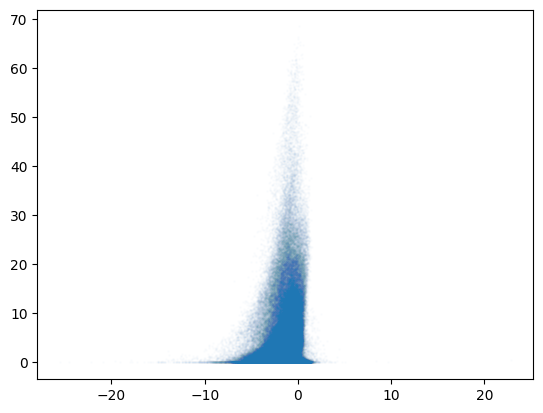

In [12]:
plt.plot(all_poly_results[:,:,3].flatten(), minvals.flatten(), 'o', ms=1, alpha=0.01)

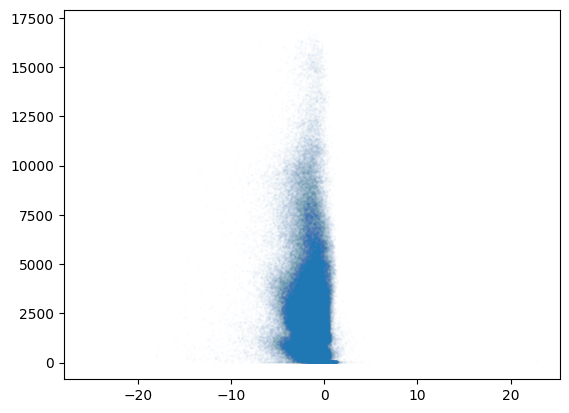

In [13]:
plt.plot(all_poly_results[:,:,3].flatten(), maxvals.flatten(), 'o', ms=1, alpha=0.01)